<a href="https://colab.research.google.com/github/gundaminpde/2022/blob/main/GPT_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

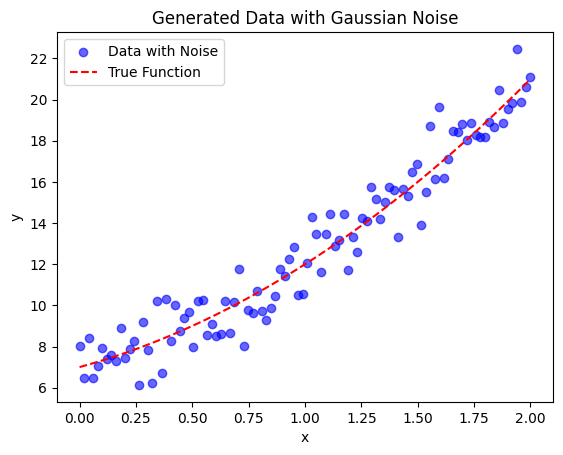

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 구간 [0, 2]에서 100개의 x 값 생성
x_values = np.linspace(0, 2, 100)

# 함수 f(x) = 2*x^2 + 3*x + 7 정의
def f(x):
    return 2 * x**2 + 3 * x + 7

# 정규분포 노이즈 추가 (평균 0, 표준편차 1)
noise = np.random.normal(0, 1, size=x_values.shape)

# y 값에 노이즈 추가
y_values = f(x_values) + noise

# 데이터 시각화
plt.scatter(x_values, y_values, label='Data with Noise', color='blue', alpha=0.6)
plt.plot(x_values, f(x_values), label='True Function', color='red', linestyle='--')
plt.title('Generated Data with Gaussian Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


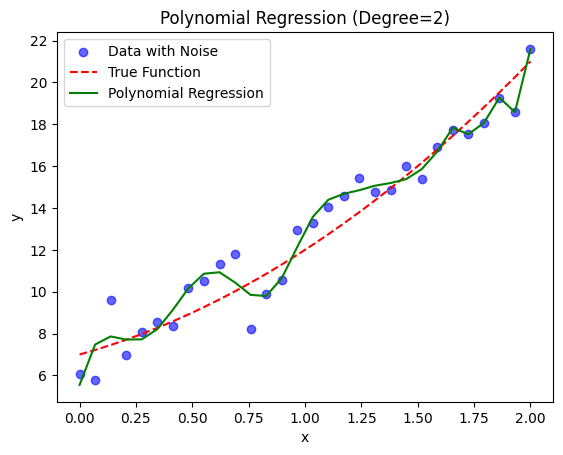

회귀 계수: [[-4.53291279e+00  4.49959710e+01 -2.92279552e+02  6.84144540e+02
  -2.80840485e+02 -4.53414398e+02 -9.99862367e+01  2.22566694e+02
   3.05738820e+02  1.91440022e+02  5.07076902e+00 -1.43894854e+02
  -1.99368011e+02 -1.59408253e+02 -5.95392152e+01  4.95140474e+01
   1.22560117e+02  1.34769147e+02  8.80206064e+01  7.90223484e+00
  -6.75036650e+01 -1.03640546e+02 -8.48517475e+01 -2.27238998e+01
   4.77255527e+01  8.49451327e+01  6.50186677e+01  3.82284664e-01
  -6.19670451e+01 -7.01766473e+01 -1.27159146e+01  5.74197217e+01
   5.99184299e+01 -1.85425001e+01 -7.06032213e+01  6.56038752e+00
   7.56675030e+01 -6.68980412e+01  2.59429923e+01 -4.97326806e+00
   3.85933688e-01]]
절편: [10.07976017]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 구간 [0, 2]에서 100개의 x 값 생성
x_values = np.linspace(0, 2, 30).reshape(-1, 1)

# 함수 f(x) = 2*x^2 + 3*x + 7 정의
def f(x):
    return 2 * x**2 + 3 * x + 7

# 정규분포 노이즈 추가 (평균 0, 표준편차 1)
noise = np.random.normal(0, 1, size=x_values.shape)

# y 값에 노이즈 추가
y_values = f(x_values) + noise

# 2차 다항식으로 변환 (PolynomialFeatures를 사용해 x^2 항 추가)
poly = PolynomialFeatures(degree=40)
x_poly = poly.fit_transform(x_values)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(x_poly, y_values)

# 모델이 예측한 y 값 계산
y_pred = model.predict(x_poly)

# 원본 함수와 회귀 결과 시각화
plt.scatter(x_values, y_values, label='Data with Noise', color='blue', alpha=0.6)
plt.plot(x_values, f(x_values), label='True Function', color='red', linestyle='--')
plt.plot(x_values, y_pred, label='Polynomial Regression', color='green')
plt.title('Polynomial Regression (Degree=2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 회귀 계수와 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)
